In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import os
import pickle
import random
from shutil import copyfile
from random import random, seed
from matplotlib.image import imread

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
# baseline model with dropout for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


Using TensorFlow backend.


In [4]:
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [5]:
FAST_RUN = False
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [6]:
filenames=os.listdir("./Videos/q/train1")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [7]:
df.head()

filename  category
0     cat.0.jpg         0
1     cat.1.jpg         0
2    cat.10.jpg         0
3   cat.100.jpg         0
4  cat.1000.jpg         0

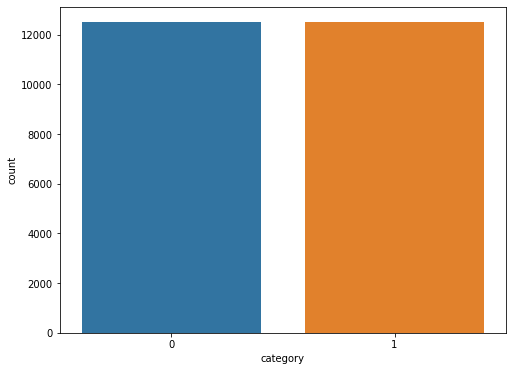

In [8]:
pyplot.figure(figsize=(8,6))
sns.countplot(x='category',data=df)
pyplot.show()

In [9]:
df['category'].value_counts()

1    12500
0    12500
Name: category, dtype: int64

In [10]:
import random

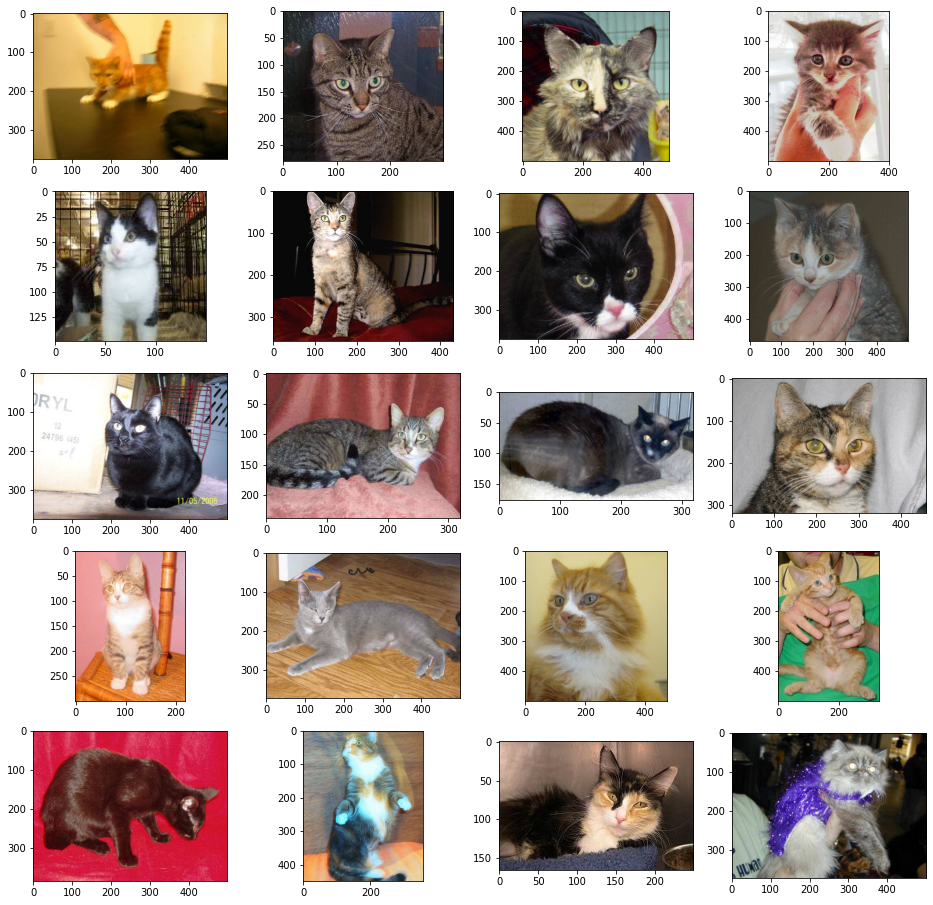

In [11]:
# plot dog photos from the dogs vs cats dataset
fig=pyplot.figure(figsize=(16, 16))
columns = 4
rows = 5
i=1
for filename in os.listdir("./Videos/q/train1")[0:20]:
    image = imread("./Videos/q/train1/" + filename)
    fig.add_subplot(rows, columns, i)
    pyplot.imshow(image)
    i+=1
pyplot.show()

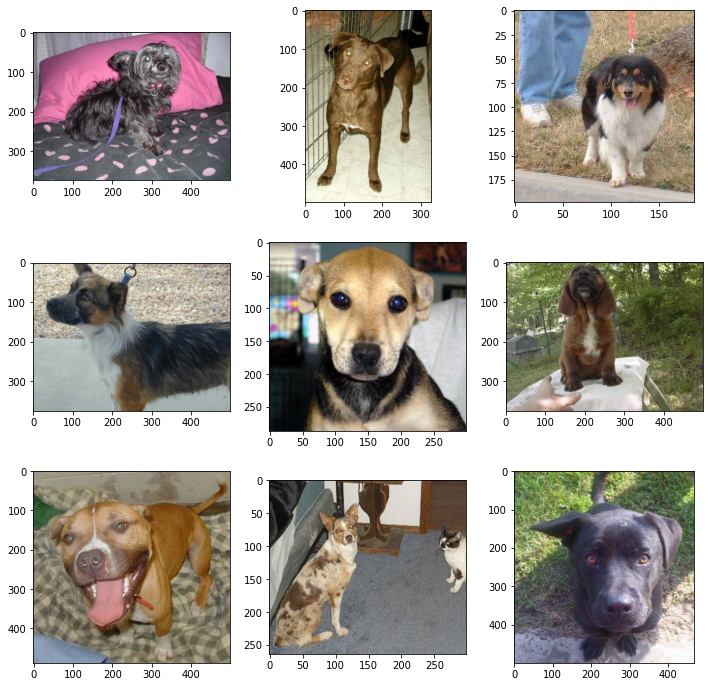

In [12]:
# plot first few dog images
pyplot.figure(figsize=(12,12))
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = "./Videos/q/train1/" + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

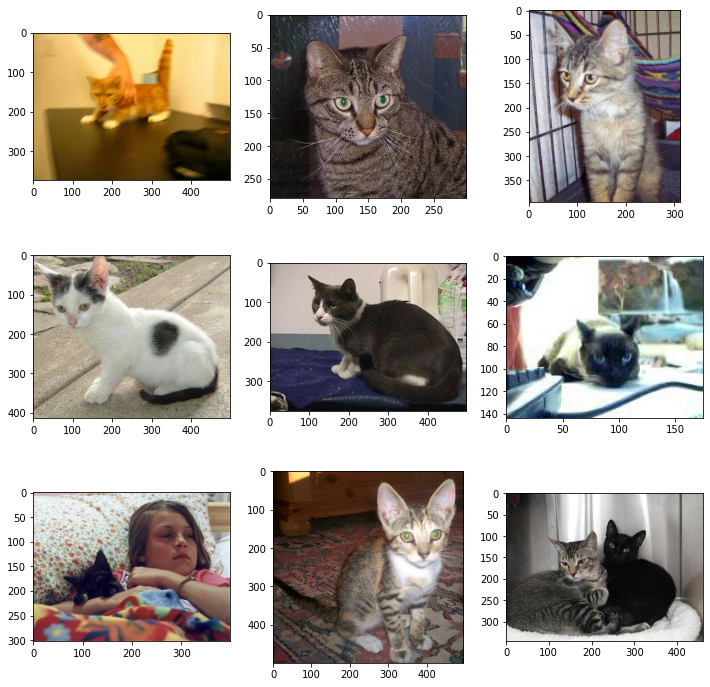

In [13]:
# plot first few cat images
pyplot.figure(figsize=(12,12))
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # define filename
    filename = "./Videos/q/train1/" + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

In [14]:
import random
import os
from os import listdir
from random import random, seed
from shutil import copyfile

In [15]:
dataset_home = 'Videos/q/'
subdirs = ['training/', 'validation/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['dogs/', 'cats/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		os.makedirs(newdir, exist_ok=True)

In [16]:

# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'Videos/q/train1'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'training/'
	if random() < val_ratio:
		dst_dir = 'validation/'
	if file.startswith('cat'):
		dst = dataset_home + dst_dir + 'cats/'  + file
		copyfile(src, dst)
	elif file.startswith('dog'):
		dst = dataset_home + dst_dir + 'dogs/'  + file
		copyfile(src, dst)

In [17]:
print(os.listdir('Videos/q/training/cats')[0:5])
print(os.listdir('Videos/q/training/dogs')[0:5])
print(os.listdir('Videos/q/validation/cats')[0:5])
print(os.listdir('Videos/q/validation/dogs')[0:5])

['cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg']
['dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.1000.jpg', 'dog.10000.jpg']
['cat.0.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10008.jpg', 'cat.10010.jpg']
['dog.0.jpg', 'dog.10001.jpg', 'dog.10004.jpg', 'dog.10006.jpg', 'dog.10011.jpg']


In [18]:
train_dir = 'Videos/q/training/'
valid_dir = 'Videos/q/validation/'

In [19]:

model = Sequential()
    
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', name='conv_1', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2), name='maxpool_1'))
model.add(Dropout(0.2))
    
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', name='conv_2', padding='same'))
model.add(MaxPooling2D((2, 2), name='maxpool_2'))
model.add(Dropout(0.2))
    
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', name='conv_3', padding='same'))
model.add(MaxPooling2D((2, 2), name='maxpool_3'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', name='conv_4', padding='same'))
model.add(MaxPooling2D((2, 2), name='maxpool_4'))
model.add(Dropout(0.2))
    
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform', name='dense_1'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid', name='output'))
    
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [20]:
# Summary of the Model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 100, 100, 64)      18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 50, 50, 128)      

In [21]:
# create data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_it = train_datagen.flow_from_directory(train_dir, class_mode='binary', batch_size=64, target_size=(200, 200))
valid_it = valid_datagen.flow_from_directory(valid_dir, class_mode='binary', batch_size=64, target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [22]:
earlystop = EarlyStopping(patience=10)

In [23]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=2, verbose=1, factor=0.5, min_lr=0.001)

In [24]:
callbacks = [earlystop, learning_rate_reduction]

In [25]:
history = model.fit_generator(train_it, steps_per_epoch=len(train_it),validation_data=valid_it, 
                              validation_steps=len(valid_it), epochs=20, callbacks=callbacks, verbose=1) 


Epoch 1/20
293/293 [==============================] - 6705s 23s/step - loss: 0.7198 - accuracy: 0.5247 - val_loss: 0.6917 - val_accuracy: 0.5775
Epoch 2/20
293/293 [==============================] - 6640s 23s/step - loss: 0.6854 - accuracy: 0.5454 - val_loss: 0.6798 - val_accuracy: 0.5834
Epoch 3/20
293/293 [==============================] - 3820s 13s/step - loss: 0.6808 - accuracy: 0.5617 - val_loss: 0.6847 - val_accuracy: 0.5813
Epoch 4/20
293/293 [==============================] - 4469s 15s/step - loss: 0.6762 - accuracy: 0.5789 - val_loss: 0.6735 - val_accuracy: 0.5862
Epoch 5/20
293/293 [==============================] - 6237s 21s/step - loss: 0.6675 - accuracy: 0.5875 - val_loss: 0.6443 - val_accuracy: 0.5945
Epoch 6/20
293/293 [==============================] - 6498s 22s/step - loss: 0.6609 - accuracy: 0.6013 - val_loss: 0.6516 - val_accuracy: 0.6051
Epoch 7/20
293/293 [==============================] - 6498s 22s/step - loss: 0.6508 - accuracy: 0.6133 - val_loss: 0.6445 - val_a

In [26]:
# save model
model.save('final_model.h5')

In [27]:
# evaluate model
_, acc = model.evaluate_generator(valid_it, steps=len(valid_it), verbose=1)
print('> %.3f' % (acc * 100.0))

99/99 [==============================] - 629s 6s/step
> 70.538


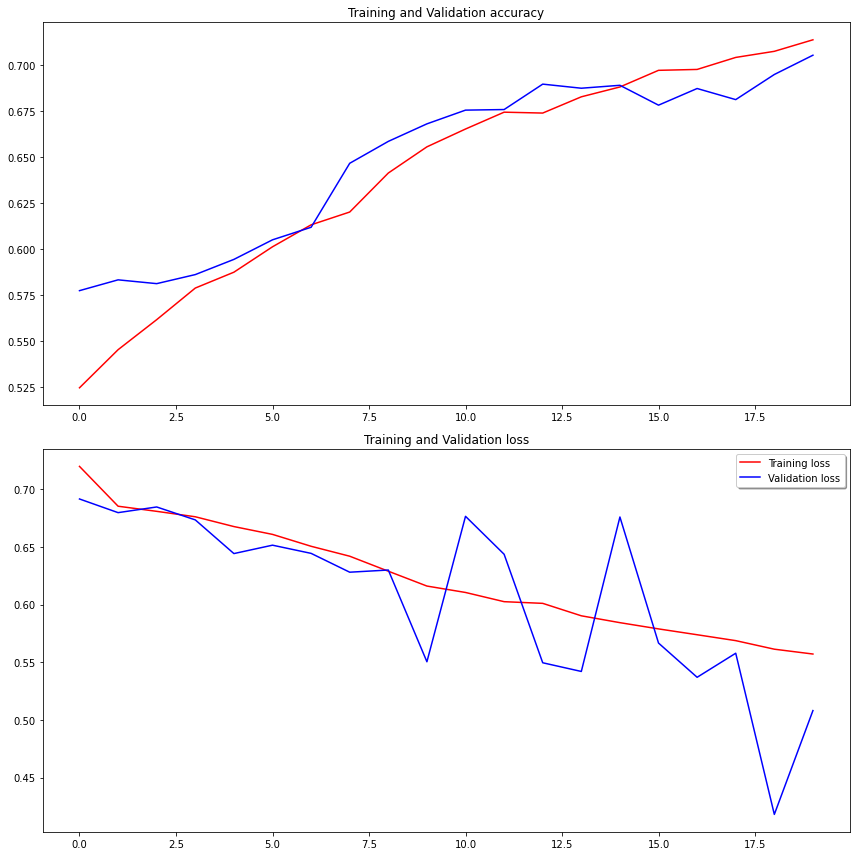

In [28]:
# A figure is also created showing a line plot for the loss and another for the accuracy of the model 
# on both the training (red) and validation (blue) datasets.

# plot diagnostic learning curves
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(len(acc))

fig, (ax1, ax2) = pyplot.subplots(2, 1, figsize=(12, 12))

# plot accuracy
ax1.plot(epochs, acc, "r", label="Training accuracy")
ax1.plot(epochs, val_acc, "b", label="Validation accuracy")
ax1.title.set_text("Training and Validation accuracy")
# plot loss
ax2.plot(epochs, loss, "r", label="Training loss")
ax2.plot(epochs, val_loss, "b", label="Validation loss")
ax2.title.set_text("Training and Validation loss")

pyplot.legend(loc='best', shadow=True)
pyplot.tight_layout()
pyplot.show()

In [30]:
test_filenames = os.listdir("./Videos/q/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})

In [31]:
nb_samples = test_df.shape[0]
nb_samples

12500

In [32]:
test_df.head()

filename
0      1.jpg
1     10.jpg
2    100.jpg
3   1000.jpg
4  10000.jpg

In [34]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(test_df,"./Videos/q/test1" , x_col='filename',y_col=None,class_mode=None,
                                              batch_size=64,target_size=(200, 200),shuffle=False)

Found 12500 validated image filenames.


In [35]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/64))
threshold = 0.6
test_df['category'] = np.where(predict > threshold, 1,0)

In [36]:
sample_test = test_df.sample(n=9).reset_index()
sample_test.head()

index   filename  category
0   1196  11074.jpg         0
1   1432  11287.jpg         0
2   2876   1336.jpg         0
3     32  10026.jpg         1
4   5957   4109.jpg         0

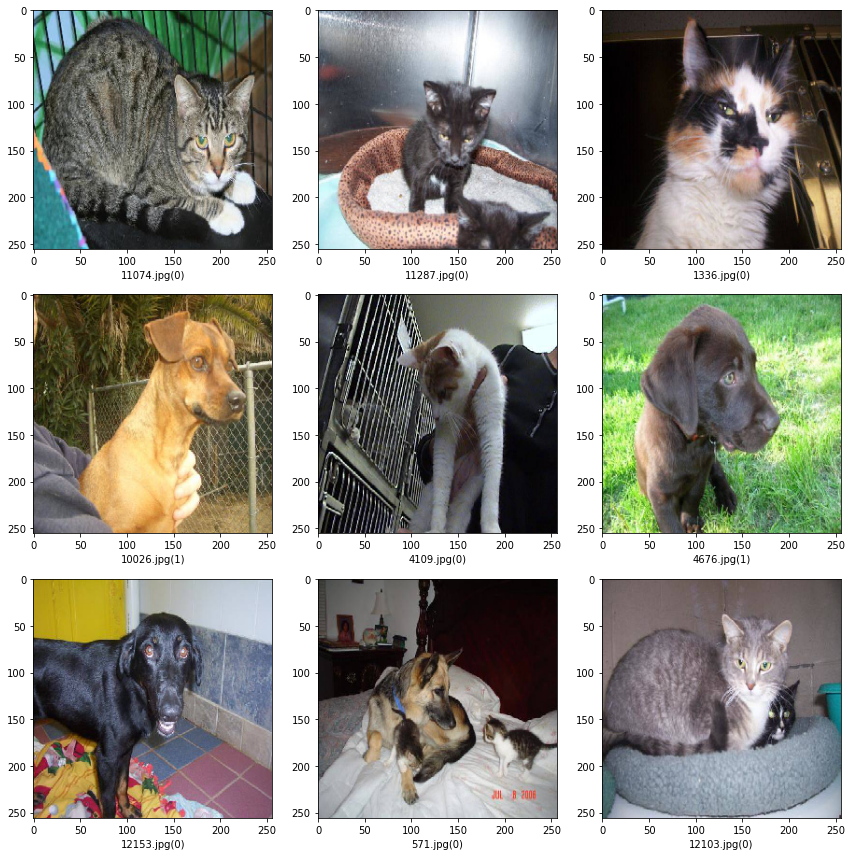

In [39]:
pyplot.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./Videos/q/test1/" + filename, target_size=(256, 256))
    pyplot.subplot(3, 3, index+1)
    pyplot.imshow(img)
    pyplot.xlabel(filename + '(' + "{}".format(category) + ')')
pyplot.tight_layout()
pyplot.show()